In [1]:
library(tidytext)
library(stringr)
library(tidyverse)
library(tibble)
library(ggplot2)
library(lubridate)
library(SnowballC)
library(RSQLite)

Warning message:
“package ‘tidytext’ was built under R version 3.5.1”── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ readr   1.1.1
✔ tibble  1.4.2     ✔ purrr   0.2.4
✔ tidyr   0.8.0     ✔ dplyr   0.7.4
✔ ggplot2 2.2.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date

Warning message:
“package ‘SnowballC’ was built under R version 3.5.1”

In [2]:
system('head -n 1 ../../data/bitcoinoct17tooct18/all_sorted.csv', intern = TRUE)

[1] "Tweet ID, Conversation ID, Author Id , Author Name, isVerified, DateTime, Language, Tweet Text, Replies, Retweets, Favorites, Mentions, Hashtags, Permalink, URLs, isPartOfConversation, isReply, isRetweet, Reply To User ID, Reply To User Name, Quoted Tweet ID, Quoted Tweet User Name, Quoted Tweet User ID"

In [3]:
system('tail -n 1 ../../data/bitcoinoct17tooct18/all_sorted.csv', intern = TRUE)

[1] "1049449307043024896,1049449307043024896,768679436,tapatrade,0,2018-10-08 19:59,und,#bitcoin https://twitter.com/MustStopMurad/status/1022169639386836992 …,0,0,0,,#bitcoin,/tapatrade/status/1049449307043024896,https://twitter.com/MustStopMurad/status/1022169639386836992,0,0,1,,,1022169639386836992,MustStopMurad,844304603336232960"

In [4]:
con = dbConnect(SQLite(), dbname="../../data/twitter.db")
tweets_df = dbGetQuery(con, 'select * from bitcoin where DateTime > "2018-03-03" and DateTime < "2018-05-03" and Language="en"')

In [5]:
#tweets_df <- read.csv('../../data/bitcoinoct17tooct18/all_sorted.csv', nrow=261079)
head(tweets_df)

TweetID,ConversationID,AuthorId,AuthorName,isVerified,DateTime,Language,TweetText,Replies,Retweets,⋯,Permalink,URLs,isPartOfConversation,isReply,isRetweet,ReplyToUserID,ReplyToUserName,QuotedTweetID,QuotedTweetUserName,QuotedTweetUserID
991467272576397312,991467272576397312,2309334781,jgolivares9,0,2018-05-01 19:59,en,About damn time somebody realized it! economic power=ultimate power and freedom #blockchain #buildalegacy #bitcoin #cryptohttps://twitter.com/domcarter11/status/991445821001433088 …,0,0,⋯,/jgolivares9/status/991467272576397312,https://twitter.com/domcarter11/status/991445821001433088,0,0,1,,,991445821001433088,Domcarter11,321420513
991467247179743234,991467247179743234,377965799,BIECommunity,0,2018-05-01 19:59,en,@bethereumteam Many of you already correctly guessed what's coming in the next days! More hints will be posted in our #Telegram group: http://t.me/bethereum #socialbetting #Blockchain #bitcoin #Crypto #cryptocurrency #Ethereum #ICO,0,0,⋯,/BIECommunity/status/991467247179743234,http://t.me/bethereum,0,0,0,,,,,
991467209527627776,991467209527627776,921421701681790977,NimbusToken,0,2018-05-01 19:59,en,Go check out the new @NimbusToken article on @Medium https://medium.com/@NimbusToken/nimbus-token-ecosystem-dbd8432fb5fc … #ico #crowdsale #cryptocurrencies #blockchain #crypto #bitcoin #ethereum #btc #eth #token,4,99,⋯,/NimbusToken/status/991467209527627776,https://medium.com/@NimbusToken/nimbus-token-ecosystem-dbd8432fb5fc,0,0,0,,,,,
991467184768495618,991466590758518784,734191521457545218,Vaughn_Tron,0,2018-05-01 19:59,en,Fiat is dead #bitcoin,0,0,⋯,/Vaughn_Tron/status/991467184768495618,,1,1,0,169686021,@kanyewest,,,
991467183489171456,991467183489171456,724013469901590531,supercatmy,0,2018-05-01 19:59,en,Bitcoin - another major multi-resistance test on its weekly timeframe! #BTCUSD #Bitcoin #Cryptocurrencypic.twitter.com/KploSzE2bj,1,0,⋯,/supercatmy/status/991467183489171456,,0,0,0,,,,,
991467067017658368,991467067017658368,765890284064542720,VSTheFoodSnob,0,2018-05-01 19:59,en,#Bitcoin Killer is coming. Learn how #TIM is revolutionising bandwidth; security and utility on #blockchain. Download whitepaper: http://talking.im/tim.pdf Web: http://talking.im TG: http://t.me/timcommunity Join 4K+ members & Get going.. #ICO #ICOs #blockchainrevolution,0,0,⋯,/VSTheFoodSnob/status/991467067017658368,http://talking.im/tim.pdf;http://talking.im;http://t.me/timcommunity,0,0,0,,,,,


In [6]:
remove_reg <- "&amp;|&lt;|&gt;"
unnest_reg  <- "([^A-Za-z_\\d#@']|'(?![A-Za-z_\\d#@]))"

tidy_tweets <- tweets_df %>% 

filter(!str_detect(TweetText, "^RT")) %>%
mutate(text = str_remove_all(TweetText, remove_reg)) %>%

unnest_tokens(word, text, token = "tweets") %>%
mutate(word=wordStem(word, language = 'english')) %>%

filter(!word %in% stop_words$word,
     !word %in% str_remove_all(stop_words$word, "'"),
     str_detect(word, "[a-z]"))

In [7]:
tidy_tweets$DateTime <- tidy_tweets$DateTime %>% as.Date(format = '%Y-%m-%d')
str(tidy_tweets)

'data.frame':	13690661 obs. of  24 variables:
 $ TweetID             : chr  "991467272576397312" "991467272576397312" "991467272576397312" "991467272576397312" ...
 $ ConversationID      : chr  "991467272576397312" "991467272576397312" "991467272576397312" "991467272576397312" ...
 $ AuthorId            : chr  "2309334781" "2309334781" "2309334781" "2309334781" ...
 $ AuthorName          : chr  "jgolivares9" "jgolivares9" "jgolivares9" "jgolivares9" ...
 $ isVerified          : chr  "0" "0" "0" "0" ...
 $ DateTime            : Date, format: "2018-05-01" "2018-05-01" ...
 $ Language            : chr  "en" "en" "en" "en" ...
 $ TweetText           : chr  "About damn time somebody realized it! economic power=ultimate power and freedom #blockchain #buildalegacy #bitc"| __truncated__ "About damn time somebody realized it! economic power=ultimate power and freedom #blockchain #buildalegacy #bitc"| __truncated__ "About damn time somebody realized it! economic power=ultimate power and freedom 

In [8]:
summary(tidy_tweets)

   TweetID          ConversationID       AuthorId          AuthorName       
 Length:13690661    Length:13690661    Length:13690661    Length:13690661   
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
  isVerified           DateTime            Language          TweetText        
 Length:13690661    Min.   :2018-03-03   Length:13690661    Length:13690661   
 Class :character   1st Qu.:2018-03-17   Class :character   Class :character  
 Mode  :character   Median :2018-03-29   Mode  :character   Mode  :character  
                    Mean   :2018-03-30                                        
                    3rd Qu.:2018-04-14                            

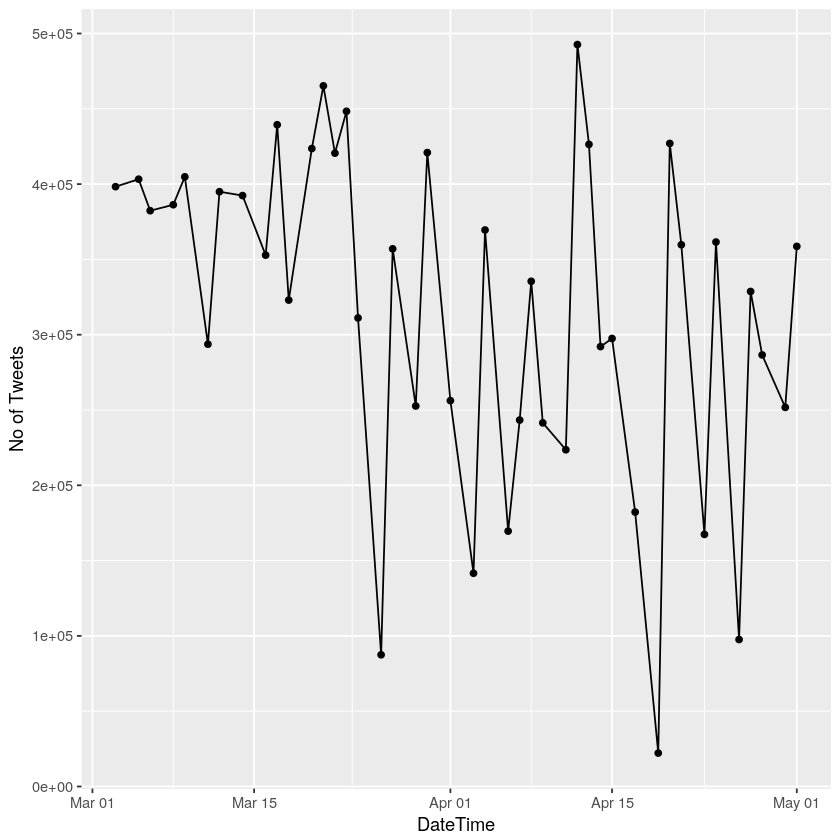

In [9]:
tidy_tweets %>% count(DateTime) %>% 
ggplot() + aes(x=DateTime, y=n) + geom_line() +geom_point() + ylab('No of Tweets')


Calculate frequency of words against each month

In [10]:
tidy_tweets_orig <- tidy_tweets %>% mutate(week = week(DateTime)) %>% group_by(week) %>% count(word, sort=TRUE) %>% 
left_join(tidy_tweets %>% mutate(week = week(DateTime)) %>% group_by(week) %>% summarize(total=n())) %>% 
mutate(freq = n/total) %>% mutate(logn = round(log(n))) %>% select(week, word, freq, n, logn, total)

Joining, by = "week"


In [1]:
n=50
tidy_tweets_freq <- tidy_tweets_orig %>% arrange(desc(n))  %>% group_by(week) %>% top_n(freq, n=n) 
tidy_tweets_freq %>% arrange(week)

ERROR: Error in tidy_tweets_orig %>% arrange(desc(n)) %>% group_by(week) %>% : could not find function "%>%"


Let's convert words to columns (dimensions)

In [12]:
tidy_tweets_plot <- tidy_tweets_freq %>% select(-n,-total, -logn) %>% spread(week, freq, fill = 0)
tidy_tweets_ca <- tidy_tweets_freq %>% select(-n, -freq,-total) %>% spread(week, logn, fill = 0) 

In [13]:
saveRDS(tidy_tweets_ca, file = paste0('../../data/tidy_tweets_per_week_log_bitcoin_',n,'.rds'))
tidy_tweets_ca

word,9,10,11,12,13,14,15,16,17,18
#ada,6,0,8,0,0,0,0,0,0,0
#airdrop,8,9,9,9,9,9,9,8,8,8
#altcoin,8,9,10,10,9,9,9,9,9,8
#bch,6,0,0,0,0,8,0,0,8,0
#binanc,7,8,8,8,8,8,8,8,8,7
#bitcoin,10,12,12,12,11,11,12,11,11,11
#bitcoincash,7,8,8,8,8,8,8,8,8,8
#bittrex,0,0,0,0,0,0,0,7,0,0
#blockchain,9,11,11,11,10,10,11,10,10,10
#bounti,7,9,9,9,9,8,9,8,0,7


In [14]:
#saveRDS(tidy_tweets_plot, file = paste0('../../data/tidy_tweets_per_week_log_bitcoin_',n,'.rds'))
tidy_tweets_plot

word,9,10,11,12,13,14,15,16,17,18
#ada,0.001338218,0.000000000,0.001827591,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000
#airdrop,0.006623298,0.005366798,0.006573968,0.005742332,0.005400029,0.004054906,0.004045849,0.003521223,0.003013419,0.003473263
#altcoin,0.008345657,0.006573499,0.007084348,0.007199183,0.007858821,0.005815975,0.006763686,0.006126322,0.006184675,0.006266619
#bch,0.001456222,0.000000000,0.000000000,0.000000000,0.000000000,0.001481585,0.000000000,0.000000000,0.001572744,0.000000000
#binanc,0.002176800,0.001926337,0.001820233,0.002202194,0.002164086,0.002485188,0.002215210,0.002931998,0.002678415,0.002806462
#bitcoin,0.067669116,0.069103272,0.068595914,0.068838377,0.067948964,0.070590458,0.070527982,0.070907739,0.067949289,0.065693825
#bitcoincash,0.002021135,0.001779844,0.001669379,0.001685481,0.001795886,0.002312098,0.001951736,0.002727182,0.003821936,0.005052615
#bittrex,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.001338872,0.000000000,0.000000000
#blockchain,0.021306030,0.022067067,0.023425444,0.024100392,0.023456397,0.022687465,0.023275410,0.020768151,0.023244072,0.024642147
#bounti,0.004022185,0.002971040,0.004912999,0.004405354,0.004215384,0.002484394,0.003237186,0.002061277,0.000000000,0.001643247


In [15]:
#tidy_tweets_plot %>% ggplot() + aes('9','10') + geom_jitter() + geom_text(aes(label = word), check_overlap = TRUE, vjust = 0)